# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
d(Q(w)) = d(\dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)) = \dfrac{1}{\ell} d(\left(y^T - w^TX^T \right)\left( y - Xw \right)) = \dfrac{1}{\ell} (d(y^Ty) - d(y^TXw) - d(w^TX^Ty) + d(w^TX^TXw)) = \dfrac{1}{\ell} (-y^TXdw - (dw)^TX^Ty + (dw)^TX^TXw + w^TX^TXdw) = \dfrac{1}{\ell} (-y^TXdw - (X^Ty)^Tdw + (X^TXw)^Tdw + w^TX^TXdw) = \dfrac{1}{\ell} (-2y^TXdw  + 2w^TX^TXdw) = \dfrac{1}{\ell} (-2y^TX  + 2w^TX^TX)dw
$$

$$
\frac{\partial Q(w)}{\partial w} = \dfrac{1}{\ell} (-2X^Ty + 2X^TXw) = 0
$$

$$
X^TXw = X^Ty
$$

Если матрица $X^TX$ невырожденна, то $w^* = (X^TX)^{-1}X^Ty$, иначе нужно взять псевдообратную или воспользоваться регуляризацией, но в рамках данной задачи будем считать, что все нормально. Так как аналитическое решение считать сложно, поэтому пользуемся итеративными методами (градиентным спуском).

Итак, градиент для нашей функции потерь $\frac{\partial Q(w)}{\partial w} = \dfrac{1}{\ell} (-2X^Ty + 2X^TXw)$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [3]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [5]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [6]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [7]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/41257/run-report/73030415/


* **StochasticDescent**: https://contest.yandex.ru/contest/41257/run-report/73030495/


* **MomentumDescent**: https://contest.yandex.ru/contest/41257/run-report/73030591/


* **Adam**: https://contest.yandex.ru/contest/41257/run-report/73030763/


* **LinearRegression**: https://contest.yandex.ru/contest/41257/run-report/73030838/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [9]:
data = pd.read_csv('autos.csv')

In [10]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

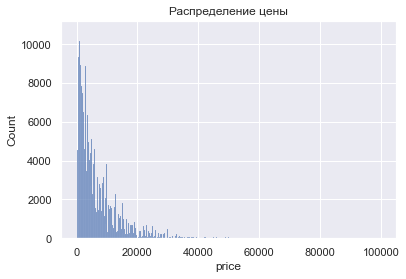

In [11]:
ax = sns.histplot(data['price'])
ax.set(title='Распределение цены');

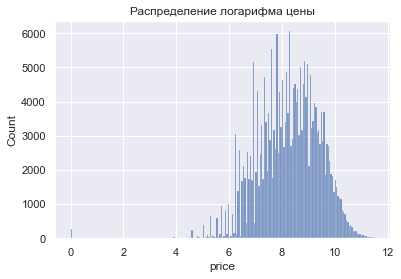

In [12]:
ax = sns.histplot(np.log(data['price']))
ax.set(title='Распределение логарифма цены');

Видим, что исходное распределение целевой переменной имеет экспоненциальную природу. Взяв логарифм, заметим, что теперь распределение похоже на нормальное. Имеет смысл работать с ним, чтобы смоделировать более сложную зависимость с помощью линейной модели.

Проверим, есть ли выбросы.

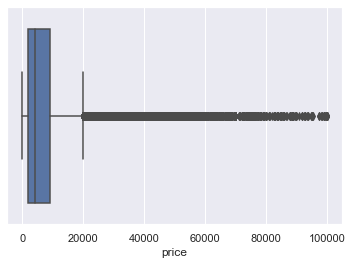

In [13]:
sns.boxplot(x=data['price']);

In [14]:
data['price'].describe()

count    241190.000000
mean       6887.741892
std        8024.451993
min           1.000000
25%        1750.000000
50%        4100.000000
75%        8999.000000
max       99999.000000
Name: price, dtype: float64

Кажется, что черные точки справа - это выбросы, которые не попадают в отрезок $[Q1-1.5*IQR; Q3+1.5*IQR]$.

Удалим их и создадим новый признак.

In [15]:
data = data[data['price'] < 20000]

In [16]:
data.loc[:, 'log_price'] = np.log(data.loc[:, 'price'])

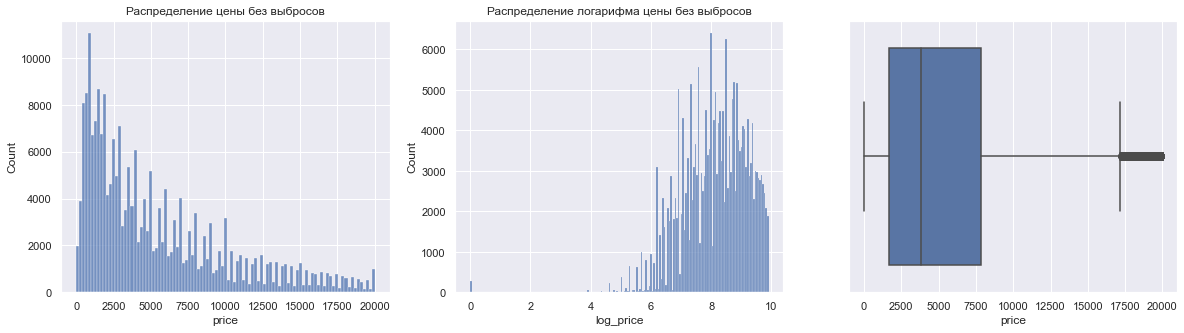

In [17]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

sns.histplot(data['price'], ax=axes[0])
axes[0].set(title='Распределение цены без выбросов');

sns.histplot(data['log_price'], ax=axes[1])
axes[1].set(title='Распределение логарифма цены без выбросов');

sns.boxplot(x=data['price'], ax=axes[2]);

Теперь изучим столбцы.

In [18]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

Разберемся сначала с категориальными признаками.

Какие есть бренды автомобилей?

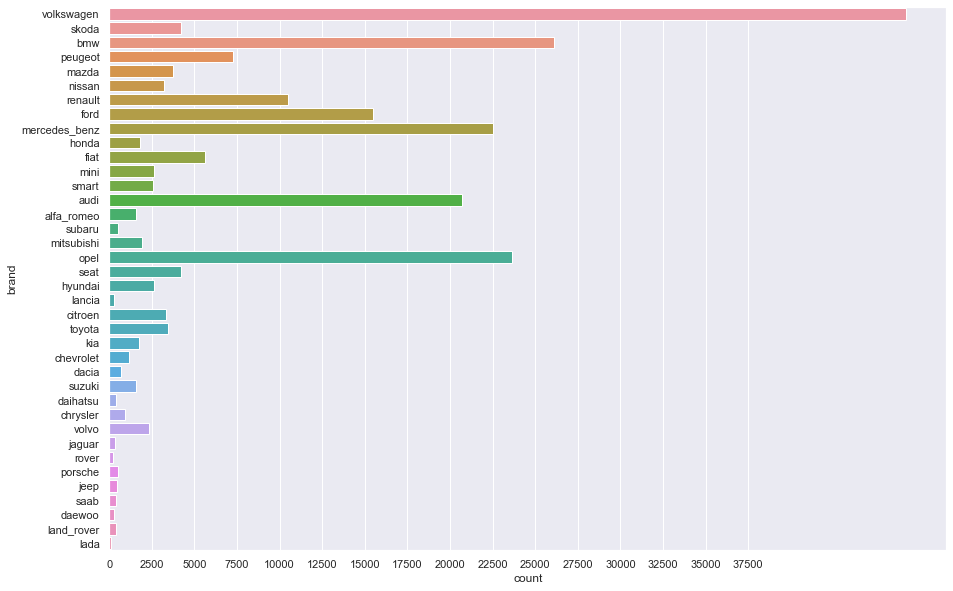

In [19]:
ax = sns.countplot(data=data, y='brand')
ax.figure.set_size_inches((15, 10))
ax.set_xticks(np.arange(0, 40000, 2500));

Какие есть модели?

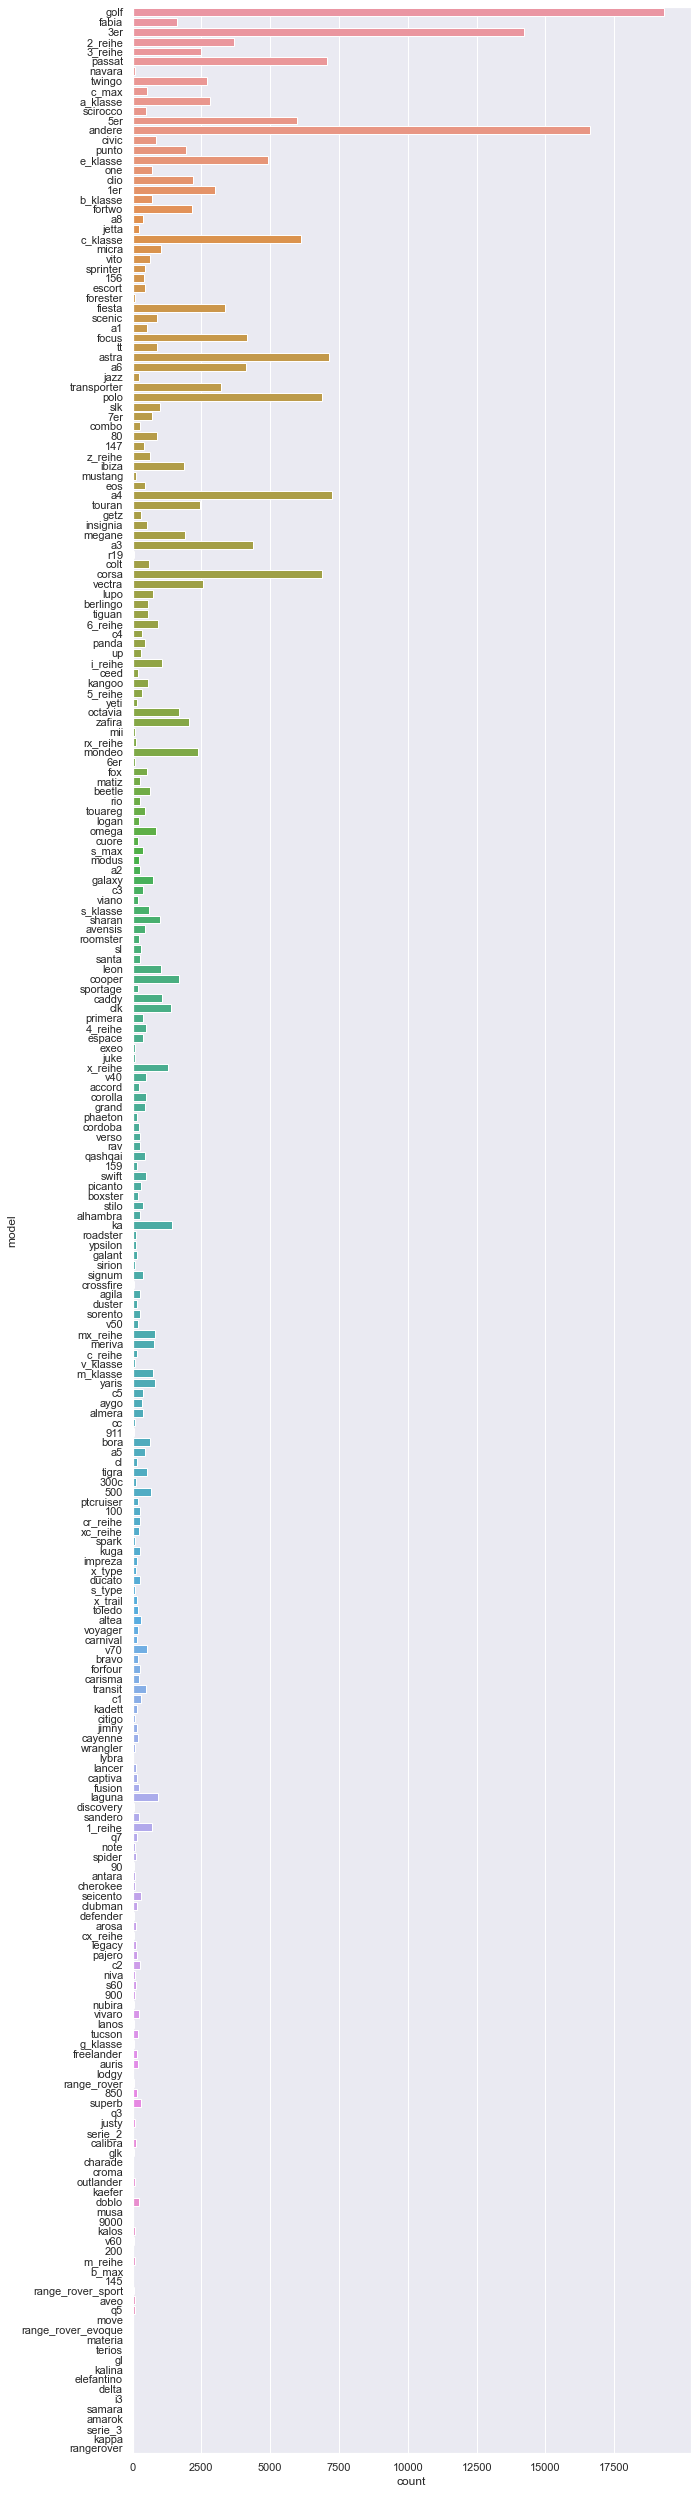

In [20]:
ax = sns.countplot(data=data, y='model')
ax.figure.set_size_inches((10, 45))
ax.set_xticks(np.arange(0, 20000, 2500));

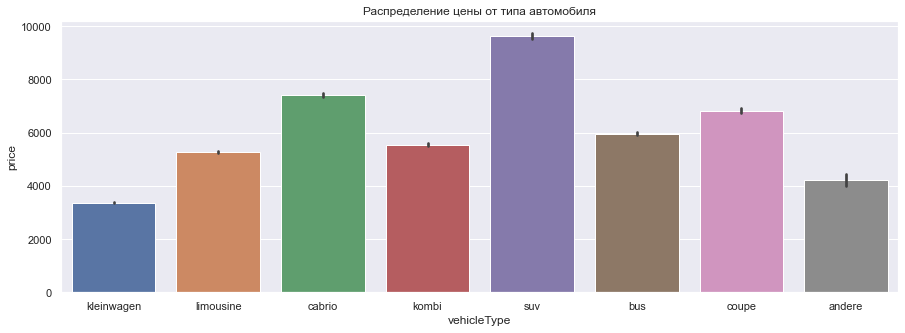

In [21]:
ax = sns.barplot(data=data, x='vehicleType', y='price')
ax.figure.set_size_inches((15, 5));
ax.set(title='Распределение цены от типа автомобиля');

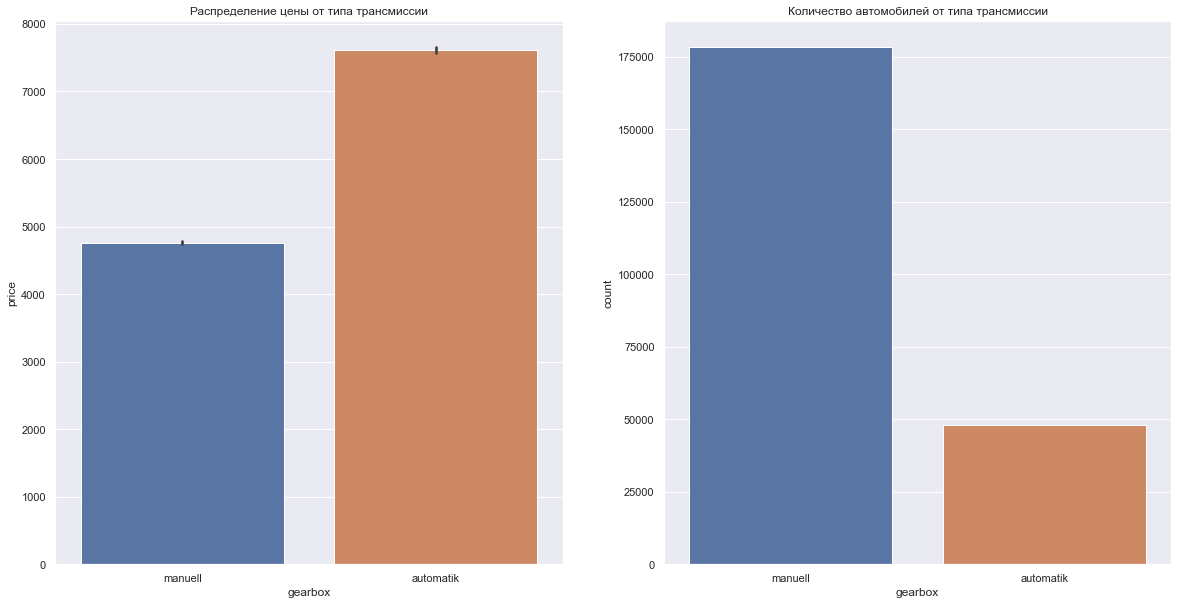

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

ax = sns.barplot(data=data, x='gearbox', y='price', ax=axes[0])
ax.set(title='Распределение цены от типа трансмиссии');

ax = sns.countplot(data=data, x='gearbox', ax=axes[1]);
ax.set(title='Количество автомобилей от типа трансмиссии');

In [23]:
data['isAutomatic'] = data['gearbox'].apply(lambda s: 1 if s == 'automatik' else 0)
data.drop('gearbox', axis=1, inplace=True)

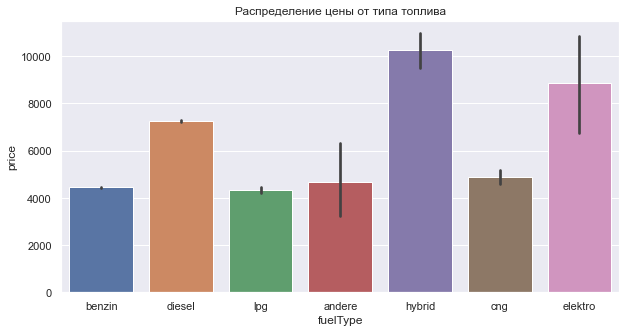

In [24]:
ax = sns.barplot(data=data, x='fuelType', y='price')
ax.figure.set_size_inches((10, 5));
ax.set(title='Распределение цены от типа топлива');

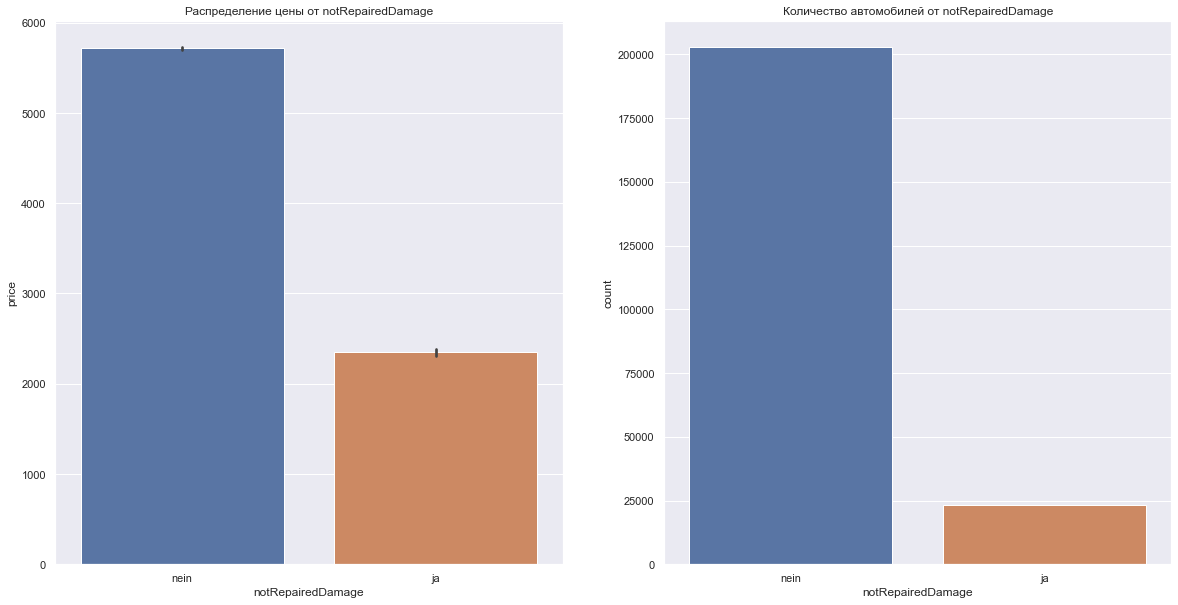

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

ax = sns.barplot(data=data, x='notRepairedDamage', y='price', ax=axes[0])
ax.set(title='Распределение цены от notRepairedDamage');

ax = sns.countplot(data=data, x='notRepairedDamage', ax=axes[1]);
ax.set(title='Количество автомобилей от notRepairedDamage');

In [26]:
data['notRepairedDamage'] = data['notRepairedDamage'].apply(lambda s: 1 if s == 'ja' else 0)

Построим графики зависимостей между числовыми признаками.

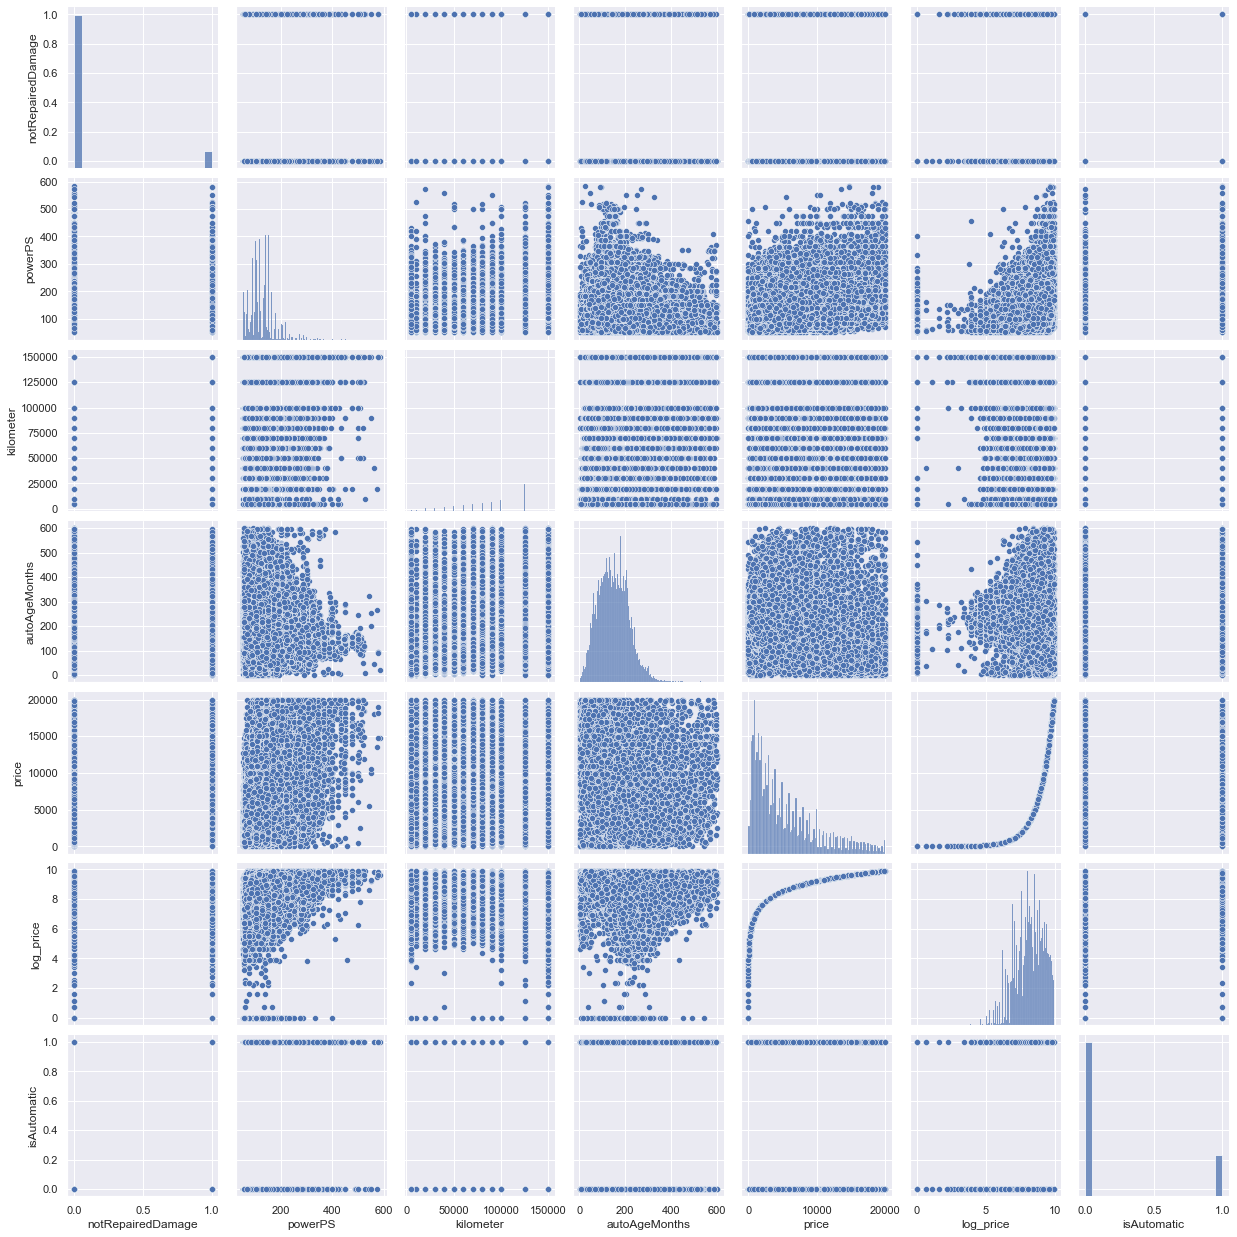

In [27]:
sns.pairplot(data);

In [28]:
data.dtypes

brand                 object
model                 object
vehicleType           object
fuelType              object
notRepairedDamage      int64
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
isAutomatic            int64
dtype: object

In [29]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['isAutomatic', 'notRepairedDamage']

In [30]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [32]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=1/9, random_state=42)

X_train.shape[0] / x.shape[0], X_val.shape[0] / x.shape[0], X_test.shape[0] / x.shape[0]

(0.8, 0.1, 0.1)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [33]:
from tqdm import tqdm
from sklearn.metrics import r2_score

In [145]:
# YOUR CODE:
def fit_with_config(descent_config):
    regression = LinearRegression(
        descent_config=descent_config
    )
    
    regression.fit(X_train, y_train.to_numpy())
    return regression
    
    
def calc_loss_with_config(descent_config):
    regression = fit_with_config(descent_config)
    return regression.calc_loss(X_val, y_val.to_numpy())

def calc_descent_stats():
    descent_stats = pd.DataFrame(index=['full', 'stochastic', 'momentum', 'adam'], columns=['best_lambda', 'best_val_loss', 'loss_history', 'num_iters', 'best_train_loss', 'best_test_loss', 'r2_train_score', 'r2_test_score'])

    for descent_name in tqdm(descent_stats.index):

        lambdas = np.logspace(-5, 1, 7)
        losses = []
        
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
            }
        }
        
        for lambda_ in lambdas:
            descent_config['kwargs']['lambda_'] = lambda_
            losses += [calc_loss_with_config(descent_config)]

        descent_stats.loc[descent_name, 'best_lambda'] = lambdas[np.argmin(losses)]
        descent_stats.loc[descent_name, 'best_val_loss'] = np.min(losses)
        
        descent_config['kwargs']['lambda_'] = descent_stats.loc[descent_name, 'best_lambda']
        regression = fit_with_config(descent_config)

        descent_stats.loc[descent_name, 'loss_history'] = regression.loss_history
        descent_stats.loc[descent_name, 'num_iters'] = len(regression.loss_history) - 1
        descent_stats.loc[descent_name, 'best_train_loss'] = regression.calc_loss(X_train, y_train.to_numpy())
        descent_stats.loc[descent_name, 'best_test_loss'] = regression.calc_loss(X_test, y_test.to_numpy())
        descent_stats.loc[descent_name, 'r2_train_score'] = r2_score(y_train, regression.predict(X_train))
        descent_stats.loc[descent_name, 'r2_test_score'] = r2_score(y_test, regression.predict(X_test))

    return descent_stats

descent_stats = calc_descent_stats()
descent_stats = descent_stats.reset_index().rename(columns={'index': 'method'})
    

100%|██████████| 4/4 [00:48<00:00, 12.07s/it]


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [146]:
descent_stats

,method,best_lambda,best_val_loss,loss_history,num_iters,best_train_loss,best_test_loss,r2_train_score,r2_test_score
0,full,1,0.451793,"[31.76799642995131, 87.0348516622776, 131.3705...",52,0.427633,0.418622,0.626875,0.635204
1,stochastic,1,0.443373,"[29.14967260266938, 79.83015374739317, 117.090...",300,0.41378,0.407585,0.638962,0.644822
2,momentum,1,0.373466,"[38.36933072446731, 106.72161470250029, 8.5893...",113,0.351973,0.345183,0.692892,0.6992
3,adam,10,0.359584,"[33.825178686951624, 1181.6587791561813, 195.7...",228,0.331367,0.325021,0.710871,0.71677


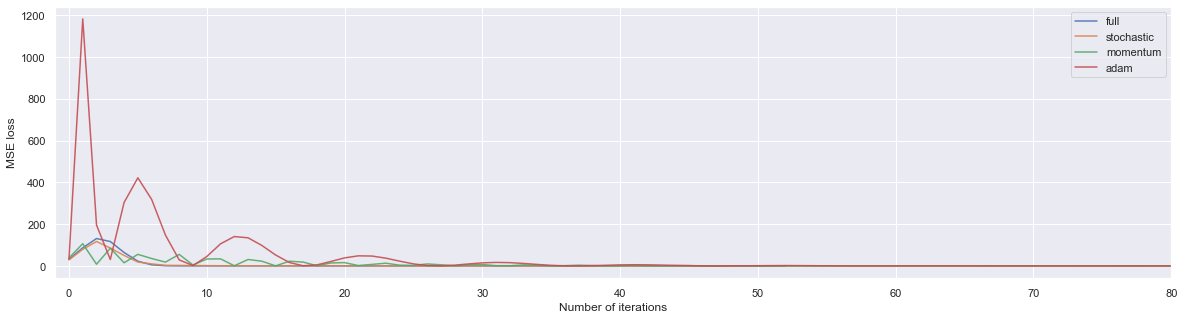

In [147]:
plt.figure(figsize=(20, 5))

for i in descent_stats.index:
    plt.plot(descent_stats.loc[i, 'loss_history'], alpha=0.9)
    
plt.legend(descent_stats.method)
plt.xlabel('Number of iterations')
plt.ylabel('MSE loss')
plt.xlim(-1, 80)
plt.show()

In [39]:
# TODO: Выводы

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [40]:
from time import time

In [41]:
def calc_stats_for_batch(batch_size):
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'lambda_': 1,
            'dimension': X_train.shape[1],
            'batch_size': batch_size
        }
    }
    
    num_tries = 10
    avg_durations = 0
    avg_num_iters = 0
    
    for i in range(num_tries):
        regression = LinearRegression(
            descent_config=descent_config,
        )
        
        ts = time()
        regression.fit(X_train, y_train.to_numpy())
        te = time()
        duration = te - ts
        
        avg_durations += duration
        avg_num_iters += len(regression.loss_history) - 1
    
    return avg_durations, avg_num_iters

batch_sizes = np.arange(5, 500, 10)
durations = []
iterations = []

for batch_size in tqdm(batch_sizes):
    avg_duration, avg_num_iters = calc_stats_for_batch(batch_size)
    durations.append(avg_duration)
    iterations.append(avg_num_iters)

100%|██████████| 50/50 [16:13<00:00, 19.48s/it]


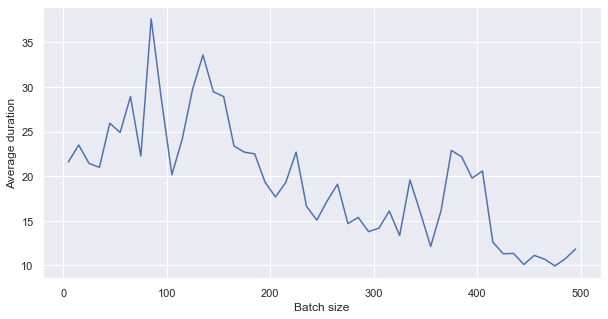

In [42]:
ax = sns.lineplot(x=batch_sizes, y=durations);
ax.set(xlabel='Batch size', ylabel='Average duration');
ax.figure.set_size_inches((10, 5))

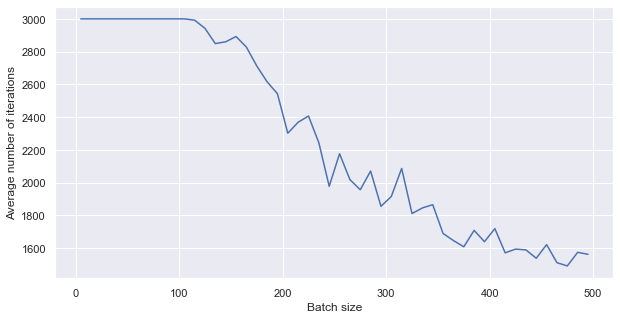

In [43]:
ax = sns.lineplot(x=batch_sizes, y=iterations);
ax.set(xlabel='Batch size', ylabel='Average number of iterations');
ax.figure.set_size_inches((10, 5))

In [44]:
# TODO: Выводы

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

$$
    \frac{\partial{(\dfrac{\mu}{2} \| w \|^2})}{\partial{w}} = \dfrac{\mu}{2} 2w = \mu w
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/41257/run-report/73175546/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [126]:
# YOUR CODE:
def calc_descent_stats_reg():
    descent_stats = pd.DataFrame(columns=['method', 'best_lambda', 'best_mu', 'is_regularized', 'best_val_loss', 'loss_history', 'num_iters', 'best_train_loss', 'best_test_loss', 'r2_train_score', 'r2_test_score'])

    for descent_name in tqdm(['full', 'stochastic', 'momentum', 'adam']):
        for is_regularized in tqdm([False, True]):
            lambdas = np.logspace(-5, 1, 7)
            mus = np.logspace(-5, 0, 6) if is_regularized else [None]
            losses = []
            
            descent_config = {
                'descent_name': descent_name,
                'kwargs': {
                    'dimension': X_train.shape[1]
                }
            }
            
            for lambda_ in lambdas:
                descent_config['kwargs']['lambda_'] = lambda_
                if not is_regularized:
                    descent_config['regularized'] = False
                    losses += [calc_loss_with_config(descent_config)]
                else:
                    descent_config['regularized'] = True
                    for mu in mus:
                        descent_config['kwargs']['mu'] = mu
                        losses += [calc_loss_with_config(descent_config)]

            min_index = np.argmin(losses)
            row = pd.Series({'method': descent_name})
            
            row['best_lambda'] = lambdas[min_index // len(mus)]
            descent_config['kwargs']['lambda_'] = row['best_lambda']
            
            row['is_regularized'] = is_regularized
            descent_config['regularized'] = is_regularized
            
            if is_regularized:
                row['best_mu'] = mus[min_index % len(mus)]
                descent_config['kwargs']['mu'] = row['best_mu']
                
            row['best_val_loss'] = losses[min_index]
            regression = fit_with_config(descent_config)

            row['loss_history'] = regression.loss_history
            row['num_iters'] = len(regression.loss_history) - 1
            row['best_train_loss'] = regression.calc_loss(X_train, y_train.to_numpy())
            row['best_test_loss'] = regression.calc_loss(X_test, y_test.to_numpy())
            row['r2_train_score'] = r2_score(y_train, regression.predict(X_train))
            row['r2_test_score'] = r2_score(y_test, regression.predict(X_test))
            
            descent_stats = descent_stats.append(row, ignore_index=True)
    return descent_stats

descent_stats_reg = calc_descent_stats_reg()
    

100%|██████████| 4/4 [06:05<00:00, 91.29s/it]


In [127]:
descent_stats_reg

,method,best_lambda,best_mu,is_regularized,best_val_loss,loss_history,num_iters,best_train_loss,best_test_loss,r2_train_score,r2_test_score
0,full,1.0,NaN,False,0.452214,"[28.082274169847757, 74.980988284785, 111.5709...",58,0.447737,0.440270,0.609334,0.616340
1,full,1.0,0.00100,True,0.530734,"[36.06420371134718, 103.85064364582064, 8.3103...",169,0.526230,0.519880,0.540846,0.546966
2,stochastic,1.0,NaN,False,0.423223,"[35.39085744850492, 96.0262266245768, 210.6281...",300,0.409075,0.404430,0.643068,0.647572
3,stochastic,1.0,0.00010,True,0.483866,"[35.87275583950748, 90.29661519040359, 5.97784...",300,0.471598,0.466386,0.588514,0.593581
4,momentum,1.0,NaN,False,0.374475,"[31.678200536242223, 91.06394336564573, 5.2061...",113,0.352532,0.346952,0.692404,0.697659
5,momentum,1.0,0.00100,True,0.376468,"[30.805839996080923, 103.63968072186216, 148.6...",300,0.357749,0.353045,0.687851,0.692350
6,adam,10.0,NaN,False,0.359412,"[37.00689707012135, 1193.4875053724818, 199.17...",196,0.331167,0.325137,0.711045,0.716669
7,adam,1.0,0.00001,True,0.360094,"[39.11877107725863, 9.210133335652232, 2.89041...",243,0.332041,0.325864,0.710282,0.716036


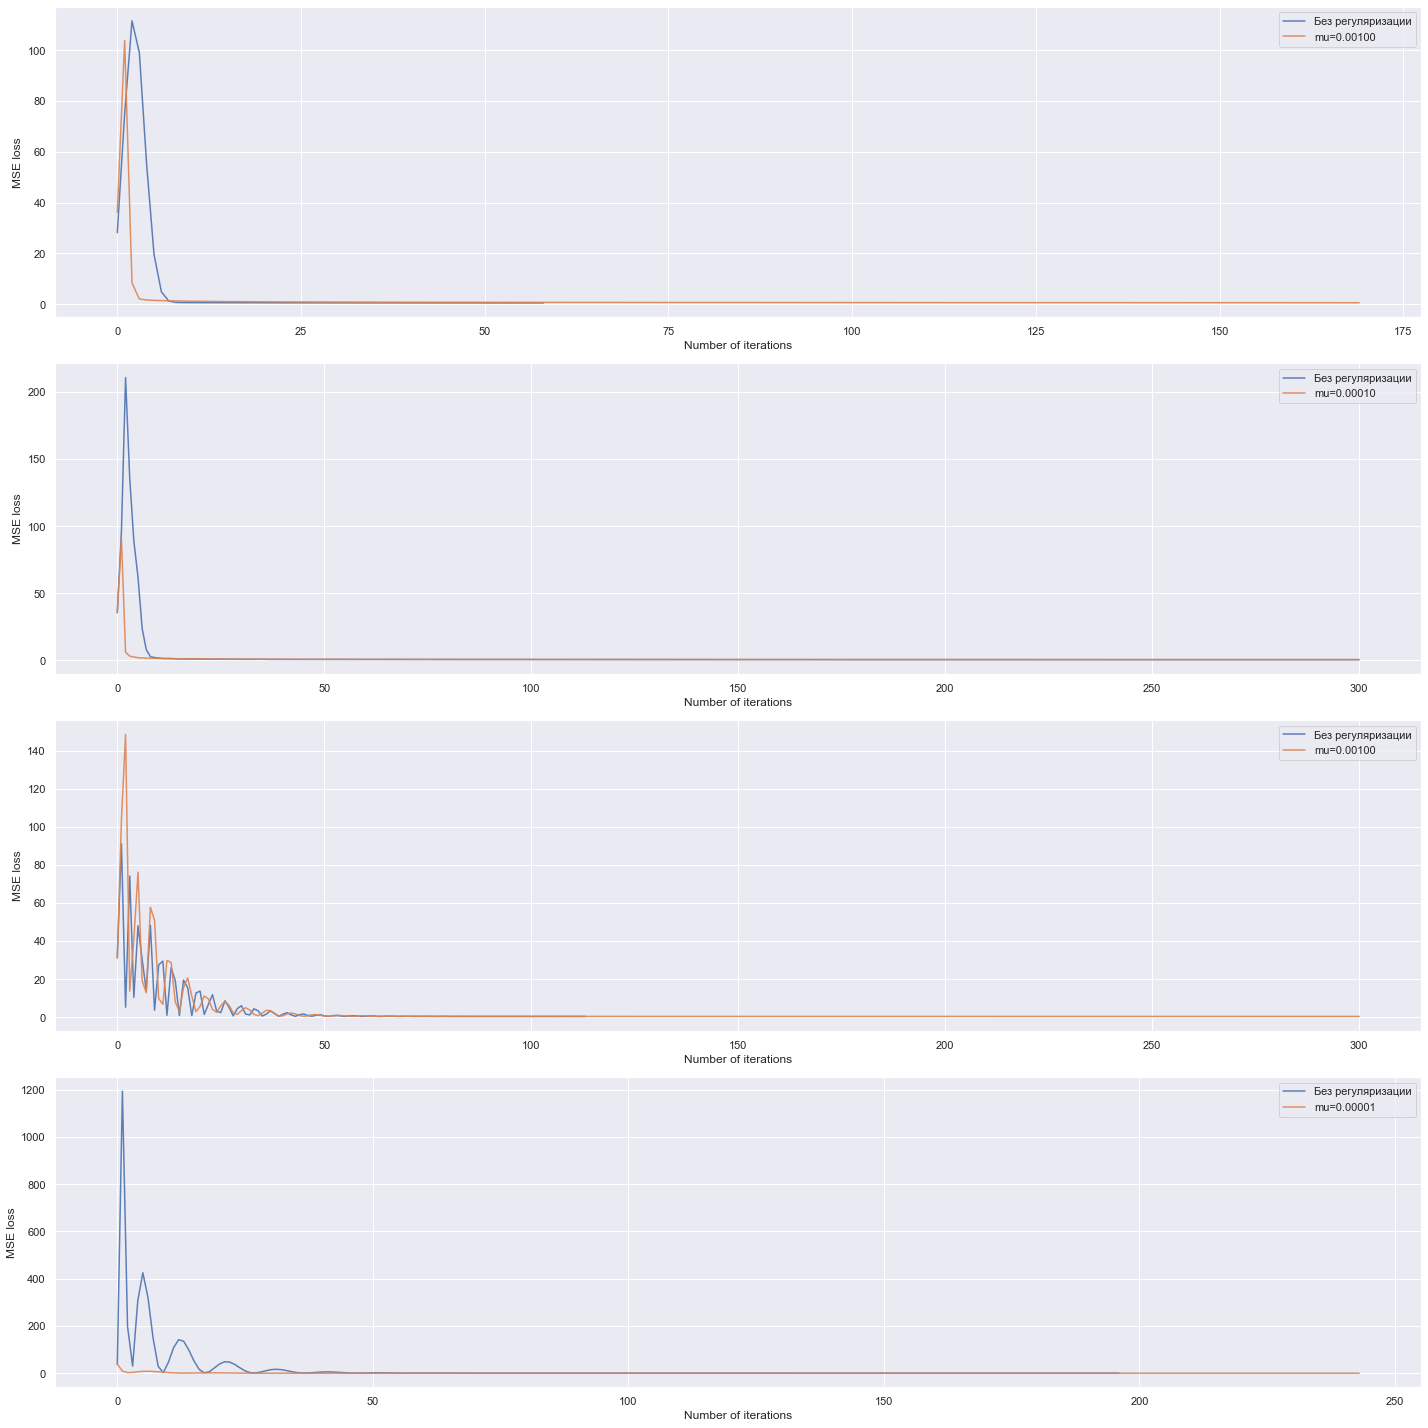

In [129]:
fig, axes = plt.subplots(4, 1, figsize=(20, 20))

for i in range(0, descent_stats_reg.shape[0], 2):
    axes[i // 2].plot(descent_stats_reg.loc[i, 'loss_history'], alpha=0.9)
    axes[i // 2].plot(descent_stats_reg.loc[i+1, 'loss_history'], alpha=0.9)
    axes[i // 2].legend(['Без регуляризации', 'mu={:.5f}'.format(descent_stats_reg.loc[i+1]['best_mu'])])
    plt.setp(axes[i // 2], xlabel='Number of iterations', ylabel='MSE loss')

plt.tight_layout()

In [130]:
# TODO: Выводы

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
    Q(w) = \frac{1}{l} \sum_{i=1}^{l} \log{(\cosh{((x_i, w) - y_i)})}
$$

$$
    \frac{\partial{Q(w)}}{\partial{w}} = \frac{1}{l} \sum_{i=1}^{l} \tanh{((x_i, w) - y_i)} x_i = \frac{1}{l} X^T \tanh{(Xw - y)}
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [171]:
from descents import LossFunction


def calc_descent_stats_for_loss_fn(loss_func):
    descent_stats = pd.DataFrame(index=['full', 'stochastic', 'momentum', 'adam'], columns=['best_lambda', 'best_val_loss', 'loss_history', 'num_iters', 'best_train_loss', 'best_test_loss', 'r2_train_score', 'r2_test_score'])
    
    for descent_name in tqdm(descent_stats.index):
        lambdas = np.logspace(-5, 1, 7)
        losses = []
        
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
                'loss_function': loss_func
            }
        }
        
        for lambda_ in lambdas:
            descent_config['kwargs']['lambda_'] = lambda_
            losses += [calc_loss_with_config(descent_config)]
        
        descent_stats.loc[descent_name, 'best_lambda'] = lambdas[np.argmin(losses)]
        descent_stats.loc[descent_name, 'best_val_loss'] = np.min(losses)
        
        descent_config['kwargs']['lambda_'] = descent_stats.loc[descent_name, 'best_lambda']
        regression = fit_with_config(descent_config)

        descent_stats.loc[descent_name, 'loss_history'] = regression.loss_history
        descent_stats.loc[descent_name, 'num_iters'] = len(regression.loss_history) - 1
        descent_stats.loc[descent_name, 'best_train_loss'] = regression.calc_loss(X_train, y_train.to_numpy())
        descent_stats.loc[descent_name, 'best_test_loss'] = regression.calc_loss(X_test, y_test.to_numpy())
        descent_stats.loc[descent_name, 'r2_train_score'] = r2_score(y_train, regression.predict(X_train))
        descent_stats.loc[descent_name, 'r2_test_score'] = r2_score(y_test, regression.predict(X_test))
    
    return descent_stats

descent_stats_logcosh = calc_descent_stats_for_loss_fn(LossFunction.LogCosh)
descent_stats_logcosh = descent_stats_logcosh.reset_index().rename(columns={'index': 'method'})

100%|██████████| 4/4 [00:55<00:00, 13.82s/it]


In [172]:
descent_stats_logcosh

,method,best_lambda,best_val_loss,loss_history,num_iters,best_train_loss,best_test_loss,r2_train_score,r2_test_score
0,full,10,0.133144,"[4.534489947384887, 7.5546460117010374, 2.2290...",119,0.129804,0.129198,0.662234,0.666955
1,stochastic,10,0.130396,"[4.517932274481223, 7.595651028720669, 2.15103...",300,0.125548,0.124766,0.666356,0.671406
2,momentum,10,0.116457,"[4.578542520067312, 7.486747793279457, 8.52811...",180,0.113471,0.11307,0.698589,0.704192
3,adam,10,0.115008,"[4.247540221194019, 32.02135995574532, 29.9709...",251,0.11056,0.110446,0.70595,0.711328


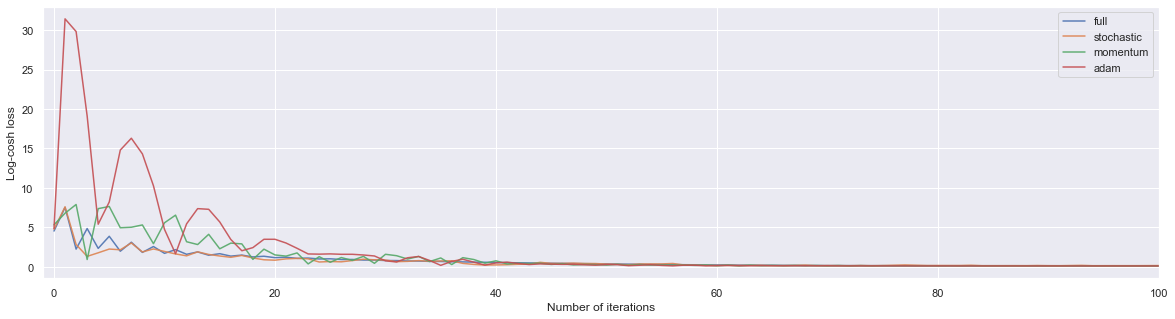

In [154]:
plt.figure(figsize=(20, 5))

for i in descent_stats_logcosh.index:
    plt.plot(descent_stats_logcosh.loc[i, 'loss_history'], alpha=0.9)
    
plt.legend(descent_stats_logcosh.method)
plt.xlabel('Number of iterations')
plt.ylabel('Log-cosh loss')
plt.xlim(-1, 100)
plt.show()

In [138]:
#TODO: Выводы

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [142]:
def calc_descent_stats_for_methods(methods):
    descent_stats = pd.DataFrame(index=methods, columns=['best_lambda', 'best_val_loss', 'loss_history', 'num_iters', 'best_train_loss', 'best_test_loss', 'r2_train_score', 'r2_test_score'])

    for descent_name in tqdm(descent_stats.index):

        lambdas = np.logspace(-5, 1, 7)
        losses = []
        
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train.shape[1],
            }
        }
        
        for lambda_ in lambdas:
            descent_config['kwargs']['lambda_'] = lambda_
            losses += [calc_loss_with_config(descent_config)]

        descent_stats.loc[descent_name, 'best_lambda'] = lambdas[np.argmin(losses)]
        descent_stats.loc[descent_name, 'best_val_loss'] = np.min(losses)
        
        descent_config['kwargs']['lambda_'] = descent_stats.loc[descent_name, 'best_lambda']
        regression = fit_with_config(descent_config)

        descent_stats.loc[descent_name, 'loss_history'] = regression.loss_history
        descent_stats.loc[descent_name, 'num_iters'] = len(regression.loss_history) - 1
        descent_stats.loc[descent_name, 'best_train_loss'] = regression.calc_loss(X_train, y_train.to_numpy())
        descent_stats.loc[descent_name, 'best_test_loss'] = regression.calc_loss(X_test, y_test.to_numpy())
        descent_stats.loc[descent_name, 'r2_train_score'] = r2_score(y_train, regression.predict(X_train))
        descent_stats.loc[descent_name, 'r2_test_score'] = r2_score(y_test, regression.predict(X_test))

    return descent_stats

descent_stats_all = calc_descent_stats_for_methods(['full', 'stochastic', 'momentum', 'adam', 'adamax'])
descent_stats_all = descent_stats_all.reset_index().rename(columns={'index': 'method'})

100%|██████████| 5/5 [01:02<00:00, 12.52s/it]


In [143]:
descent_stats_all

,method,best_lambda,best_val_loss,loss_history,num_iters,best_train_loss,best_test_loss,r2_train_score,r2_test_score
0,full,1,0.451669,"[27.937016155824075, 76.98807721844899, 115.82...",55,0.439501,0.435147,0.61652,0.620803
1,stochastic,1,0.455811,"[27.88996739194549, 63.29936861323373, 112.741...",300,0.410902,0.402589,0.641473,0.649176
2,momentum,1,0.376029,"[30.718623628479648, 86.96214609063246, 5.5507...",113,0.351793,0.344543,0.693049,0.699758
3,adam,10,0.360053,"[41.11409622190812, 1139.8246963649212, 193.29...",219,0.331572,0.325684,0.710692,0.716192
4,adamax,10,0.361854,"[32.30645370848505, 1218.7374774587654, 401.60...",167,0.338298,0.332235,0.704823,0.710484


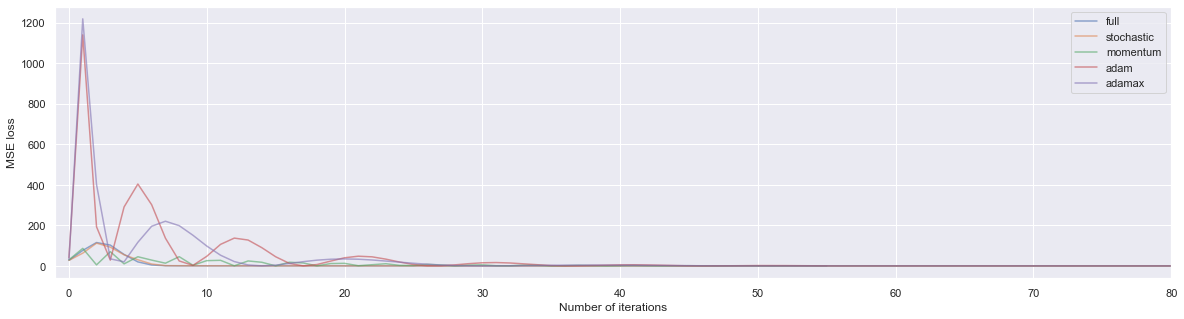

In [150]:
plt.figure(figsize=(20, 5))

for i in descent_stats_all.index:
    plt.plot(descent_stats_all.loc[i, 'loss_history'], alpha=0.6)
    
plt.legend(descent_stats_all.method)
plt.xlabel('Number of iterations')
plt.ylabel('MSE loss')
plt.xlim(-1, 80)
plt.show()

In [151]:
#TODO: Выводы

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

$$
    Q(w) = \frac{1}{l} \sum_{i=1}^{l} |(x_i, w) - y_i|
$$

$$
    \frac{\partial{Q(w)}}{\partial{w}} = \frac{1}{l} \sum_{i=1}^{l} sign((x_i, w) - y_i) x_i = \frac{1}{l} X^T sign(Xw - y)
$$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [173]:
# YOUR CODE:
descent_stats_mae = calc_descent_stats_for_loss_fn(LossFunction.MAE)
descent_stats_mae = descent_stats_mae.reset_index().rename(columns={'index': 'method'})

100%|██████████| 4/4 [00:52<00:00, 13.22s/it]


In [174]:
descent_stats_mae

,method,best_lambda,best_val_loss,loss_history,num_iters,best_train_loss,best_test_loss,r2_train_score,r2_test_score
0,full,1,0.465076,"[5.764979213938728, 4.42614023141024, 3.397091...",83,0.463107,0.464662,0.527036,0.525792
1,stochastic,1,0.405968,"[4.9548705793705965, 3.6253428692516247, 2.611...",300,0.407443,0.405644,0.61159,0.617297
2,momentum,10,0.350327,"[5.000615944663596, 8.388163903079075, 9.36686...",256,0.344996,0.345406,0.683131,0.688012
3,adam,10,0.348355,"[5.7697711996275585, 31.902169747763544, 30.28...",300,0.342175,0.342988,0.689701,0.695276


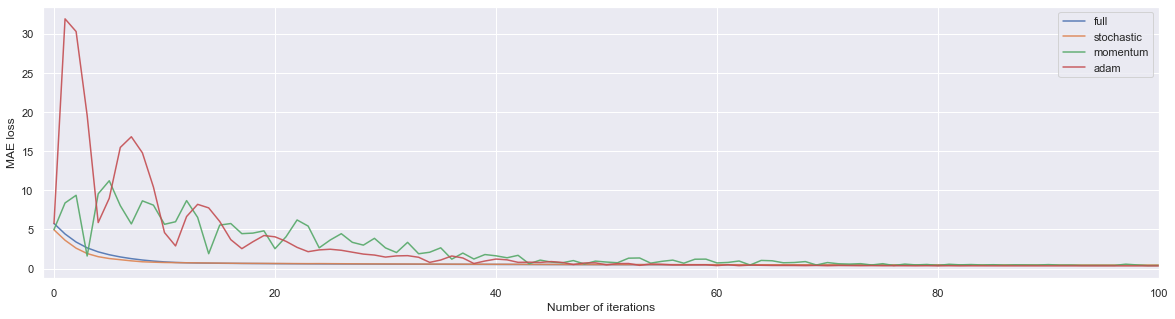

In [175]:
plt.figure(figsize=(20, 5))

for i in descent_stats_mae.index:
    plt.plot(descent_stats_mae.loc[i, 'loss_history'], alpha=0.9)
    
plt.legend(descent_stats_mae.method)
plt.xlabel('Number of iterations')
plt.ylabel('MAE loss')
plt.xlim(-1, 100)
plt.show()

$$
    Q(w) = \frac{1}{l} \sum_{i=1}^{l} \frac{1}{2} ((x_i, w) - y_i)^2 [|(x_i, w) - y_i| \le \delta] + \delta(|(x_i, w) - y_i| - \frac{1}{2}\delta) [|(x_i, w) - y_i| > \delta]
$$

$$
    \frac{\partial{Q(w)}}{\partial{w}} = \frac{1}{l} \sum_{i=1}^{l} ((x_i, w) - y_i)x_i [|(x_i, w) - y_i| \le \delta] + \delta sign((x_i, w) - y_i) x_i [|(x_i, w) - y_i| > \delta]
$$

Обозначим объекты для которых невязка меньше дельты за $X_1$ и невязку за $(Xw - y)_1$. Для которых больше соответственно за $X_2$ и $(Xw - y)_2$.

Тогда полный градиент в матричном виде

$$
\frac{\partial{Q(w)}}{\partial{w}} = \frac{1}{l} X_1^T (Xw - y)_1 + \frac{\delta}{l} X_2^T sign(Xw - y)_2
$$

In [177]:
# YOUR CODE:
descent_stats_huber = calc_descent_stats_for_loss_fn(LossFunction.Huber)
descent_stats_huber = descent_stats_huber.reset_index().rename(columns={'index': 'method'})

100%|██████████| 4/4 [01:28<00:00, 22.08s/it]


In [178]:
descent_stats_huber

,method,best_lambda,best_val_loss,loss_history,num_iters,best_train_loss,best_test_loss,r2_train_score,r2_test_score
0,full,10,0.142869,"[4.857578999392394, 7.601180160521682, 2.58005...",133,0.141402,0.140495,0.660465,0.66421
1,stochastic,10,0.14723,"[4.5396160619018, 7.852490216157584, 2.3481956...",300,0.136784,0.136739,0.677828,0.68247
2,momentum,10,0.126533,"[5.1808349850153075, 7.33395965162333, 8.45991...",172,0.12336,0.123068,0.698393,0.703843
3,adam,10,0.124879,"[4.779545972506549, 31.85294874417554, 30.1963...",255,0.120235,0.120213,0.705404,0.710774


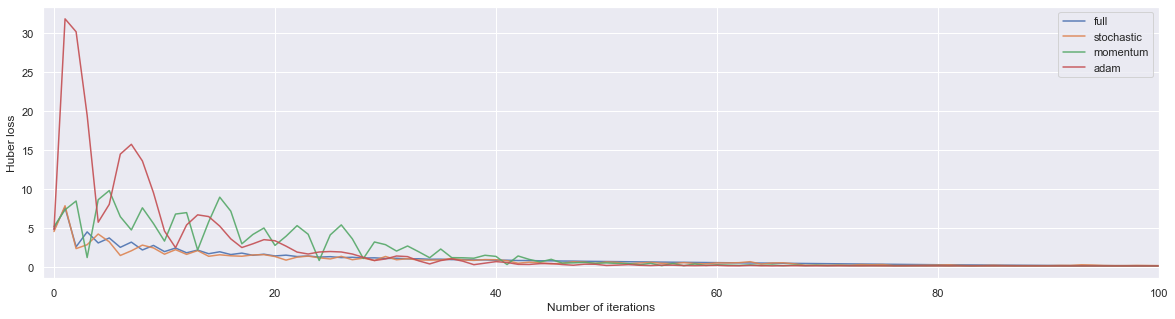

In [180]:
plt.figure(figsize=(20, 5))

for i in descent_stats_huber.index:
    plt.plot(descent_stats_huber.loc[i, 'loss_history'], alpha=0.9)
    
plt.legend(descent_stats_huber.method)
plt.xlabel('Number of iterations')
plt.ylabel('Huber loss')
plt.xlim(-1, 100)
plt.show()

In [181]:
#TODO: Выводы